### Extract area of interest

In [2]:
library(raster)
library(rgdal)
library(rgeos)
library(RColorBrewer)

In [3]:
setwd("~/RDemo/capstone/Sentinel2data")

Read in the Sentinel 2 image that was resampled previously in SNAP and the shapefile with administrative boundaries:

In [4]:
img <- stack("subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.tif")

In [5]:
setwd("~/RDemo/capstone/webdata/aministrativeAreas")
ireland_shp <- readOGR(".", "0b3cbe50-ea67-467b-adb6-f3d9d3aaa43a2020329-1-f7bsff.bn1f")
#ireland_shp

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\Roxana\Documents\RDemo\capstone\webdata\aministrativeAreas", layer: "0b3cbe50-ea67-467b-adb6-f3d9d3aaa43a2020329-1-f7bsff.bn1f"
with 31 features
It has 13 fields


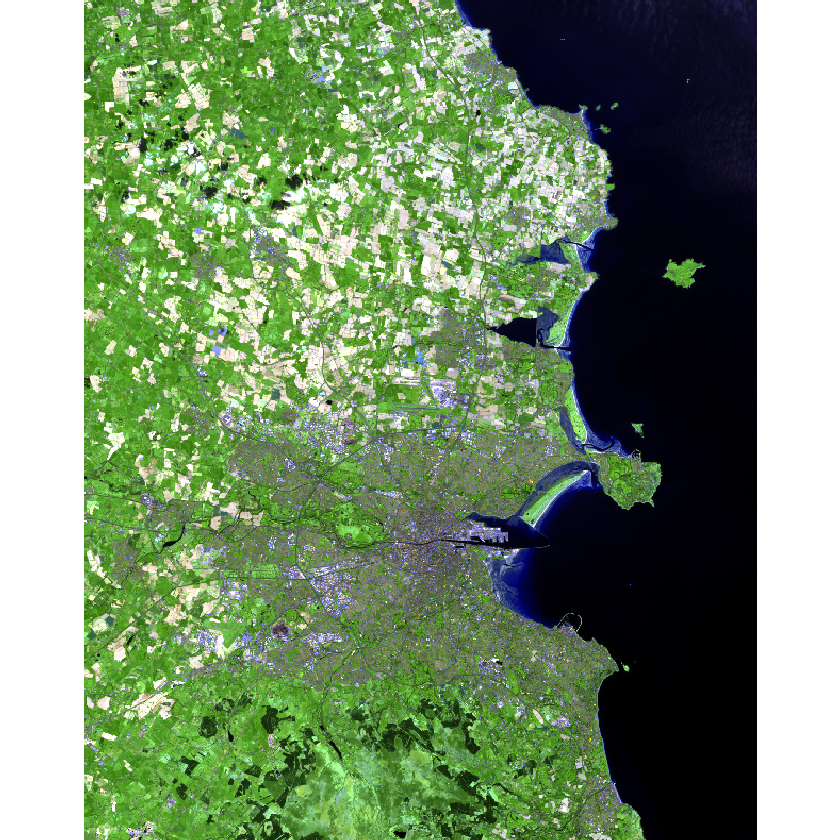

In [6]:
#plotRGB(img, r=4, g=3, b=2, stretch="lin") # natural color
plotRGB(img, r=12, g=11, b=4, stretch="lin") # False-color Urban
#plotRGB(img, r=8, g=4, b=3, stretch="lin") # color-infrared

In [7]:
compareCRS(ireland_shp, img) # check if the projections of the two datasets are identical

[1] FALSE

They don't have same projections, so we will use spTransform() fc later on to change to the corect projection.

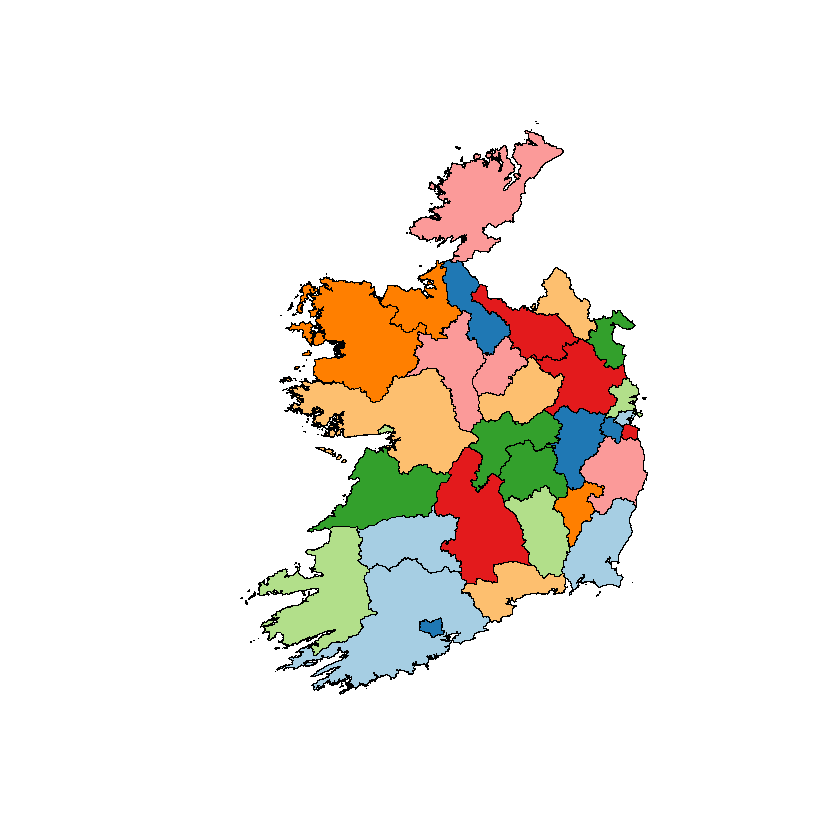

In [8]:
plot(ireland_shp, col=brewer.pal(n = 8, name = 'Paired'))

In [9]:
nlayers(img)
res(img)
crs(img)

[1] 14

[1] 10 10

CRS arguments:
 +proj=utm +zone=29 +datum=WGS84 +units=m +no_defs +ellps=WGS84
+towgs84=0,0,0 

In [10]:
crs(ireland_shp)
head(ireland_shp)

CRS arguments:
 +proj=tmerc +lat_0=53.5 +lon_0=-8 +k=0.99982 +x_0=600000 +y_0=750000
+ellps=GRS80 +units=m +no_defs 

ENGLISH                  GAEILGE CONTAE             COUNTY    PROVINCE
0 DUBLIN CITY COUNCIL      NA      Baile Ã\201tha Cliath DUBLIN    Leinster
1 CORK CITY COUNCIL        NA      Corcaigh           CORK      Munster 
2 GALWAY CITY COUNCIL      NA      Gaillimh           GALWAY    Connacht
3 OFFALY COUNTY COUNCIL    NA      UÃ­bh FhailÃ­      OFFALY    Leinster
4 WICKLOW COUNTY COUNCIL   NA      Cill MhantÃ¡in     WICKLOW   Leinster
5 TIPPERARY COUNTY COUNCIL NA      Tiobraid Ã\201rann    TIPPERARY Munster 
  GUID                                 CENTROID_X CENTROID_Y AREA       CC_ID 
0 2ae19629-1433-13a3-e055-000000000001 716469.8   735272.1    128350164 265011
1 2ae19629-1434-13a3-e055-000000000001 565833.1   571933.8    186597606  45511
2 2ae19629-1435-13a3-e055-000000000001 530067.7   726500.5     50695047  65011
3 2ae19629-1496-13a3-e055-000000000001 631261.7   709672.3   2000024664 185001
4 2ae19629-149e-13a3-e055-000000000001 707784.8   690738.1   2025160942 255001
5 2ae19629-1499-13a3-e055-000000000001 605191.5   659297.9   4303395909 215003
  OBJECTID Shape__Are Shape__Len
0 1         128350164 101493.21 
1 2         186597606  80293.73 
2 3          50695047  64020.73 
3 4        2000024664 389927.71 
4 5        2025160942 320629.96 
5 6        4303395909 517791.40

In [11]:
ireland_shp <- spTransform(ireland_shp, CRS("+init=EPSG:32629"))
compareCRS(ireland_shp, img)

[1] TRUE

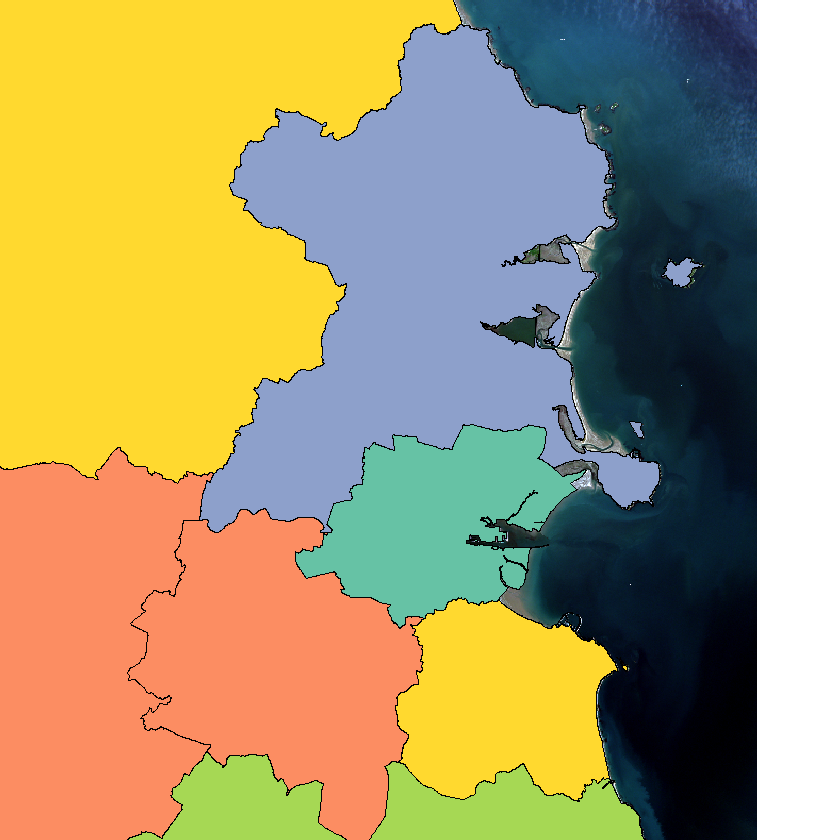

In [12]:
plotRGB(img, r=4, g=3, b=2, stretch="lin")
plot(ireland_shp, col=brewer.pal(n = 8, name = 'Set2'), add=TRUE)

In [13]:
table(ireland_shp$COUNTY)


   CARLOW     CAVAN     CLARE      CORK   DONEGAL    DUBLIN    GALWAY     KERRY 
        1         1         1         2         1         4         2         1 
  KILDARE  KILKENNY     LAOIS   LEITRIM  LIMERICK  LONGFORD     LOUTH      MAYO 
        1         1         1         1         1         1         1         1 
    MEATH  MONAGHAN    OFFALY ROSCOMMON     SLIGO TIPPERARY WATERFORD WESTMEATH 
        1         1         1         1         1         1         1         1 
  WEXFORD   WICKLOW 
        1         1 

In [14]:
codublin <- which(ireland_shp$COUNTY == 'DUBLIN') # selecting rows for County Dublin areas
codublin <- ireland_shp[codublin, ]
#codublin # SpatialPolygonsDataFrame

In [15]:
head(codublin)

ENGLISH                               GAEILGE CONTAE             COUNTY
0  DUBLIN CITY COUNCIL                   NA      Baile Ã\201tha Cliath DUBLIN
9  SOUTH DUBLIN COUNTY COUNCIL           NA      Baile Ã\201tha Cliath DUBLIN
10 FINGAL COUNTY COUNCIL                 NA      Baile Ã\201tha Cliath DUBLIN
21 DUN LAOGHAIRE-RATHDOWN COUNTY COUNCIL NA      Baile Ã\201tha Cliath DUBLIN
   PROVINCE GUID                                 CENTROID_X CENTROID_Y
0  Leinster 2ae19629-1433-13a3-e055-000000000001 716469.8   735272.1  
9  Leinster 2ae19629-14a1-13a3-e055-000000000001 706125.2   725999.5  
10 Leinster 2ae19629-14a0-13a3-e055-000000000001 717228.5   750698.7  
21 Leinster 2ae19629-149f-13a3-e055-000000000001 720713.9   724471.4  
   AREA      CC_ID  OBJECTID Shape__Are Shape__Len
0  128350164 265011  1       128350164  101493.21 
9  223448222 265003 10       223448222   93355.95 
10 457879166 265002 11       457879166  247881.72 
21 126563027 265001 22       126563027   70787.29

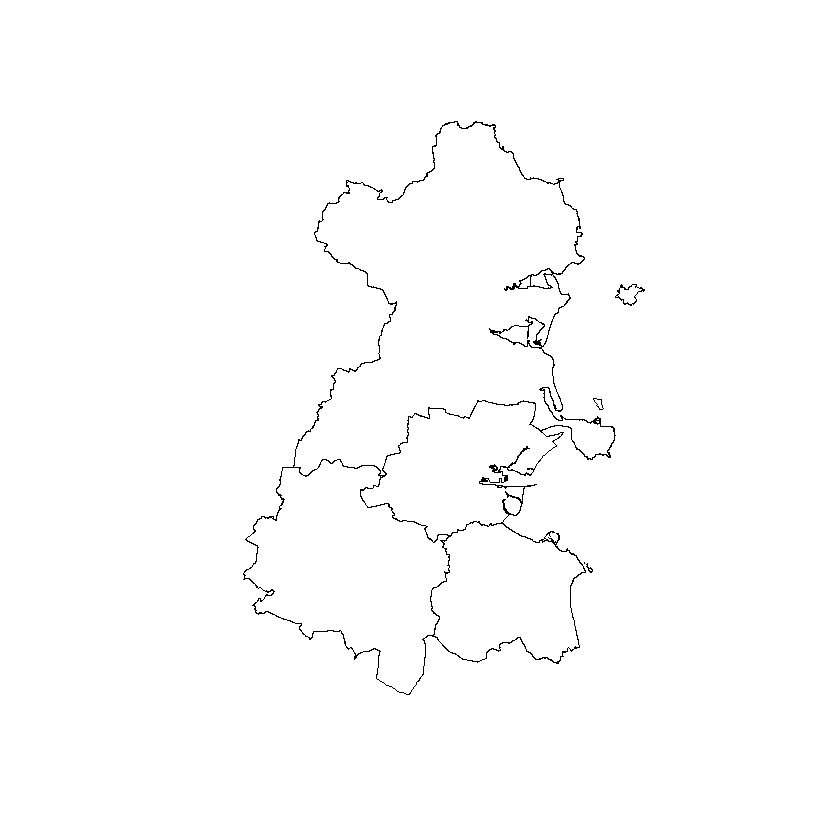

In [16]:
plot(codublin)

In [17]:
codublin_shp <- crop(ireland_shp, codublin)

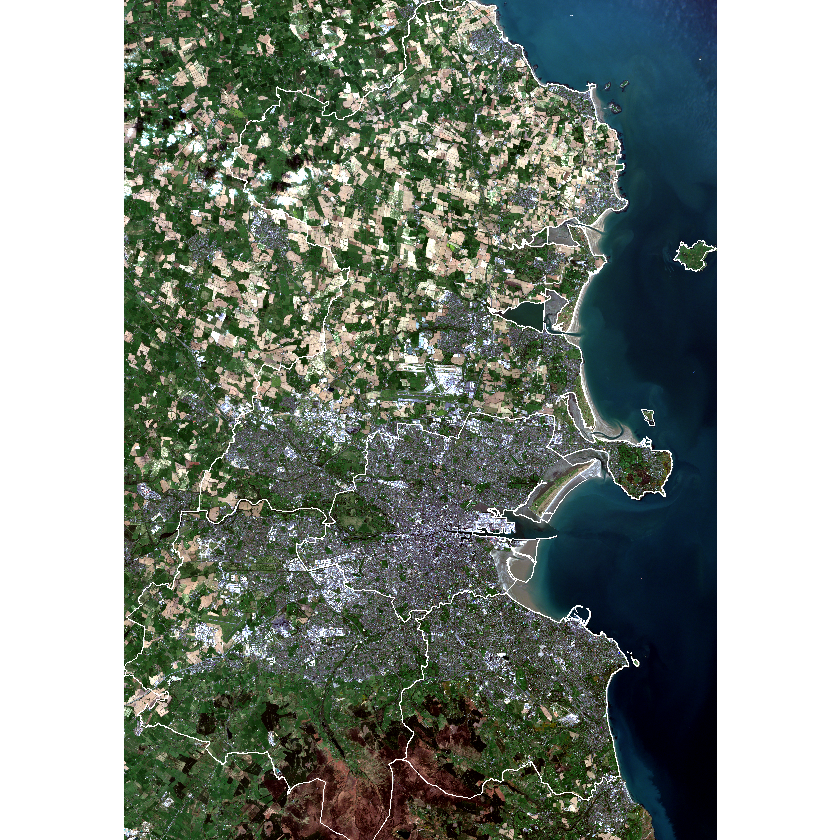

In [18]:
img_subset <- crop(img, codublin_shp) # subset raster according to shapefile
plotRGB(img_subset, r=4, g=3, b=2, stretch="lin")
plot(codublin_shp, border='white', add=TRUE)

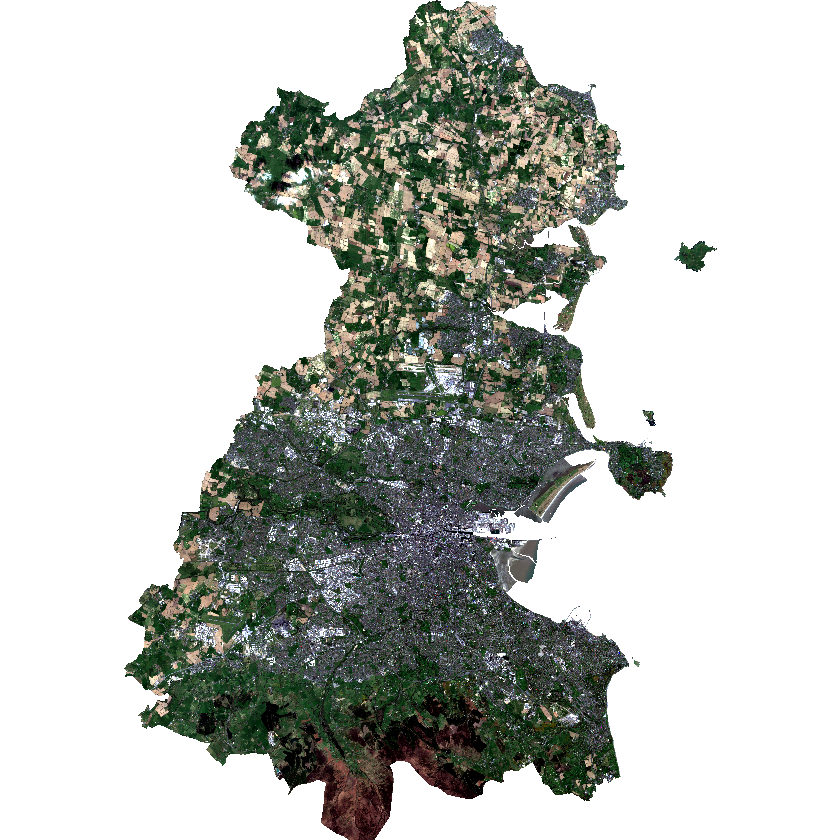

In [19]:
masked <- mask(img_subset, codublin_shp["COUNTY"]) # mask to co dublin area, this takes few mins
plotRGB(masked, r=4, g=3, b=2, stretch="lin")

In [20]:
nlayers(masked)
compareCRS(ireland_shp, masked)

[1] 14

[1] TRUE

In [21]:
masked
# save the resulting object to the hard drive
save(masked, file="masked.rda")
# and load it from the hard disk if necessary
#load(file="masked.rda")

class       : RasterBrick 
dimensions  : 5061, 3570, 18067770, 14  (nrow, ncol, ncell, nlayers)
resolution  : 10, 10  (x, y)
extent      : 663550, 699250, 5895810, 5946420  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=29 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : C:/Users/Roxana/AppData/Local/Temp/RtmpC8Yhvk/raster/r_tmp_2020-07-09_205012_3460_27363.grd 
names       : subset_0_//esampled.1, subset_0_//esampled.2, subset_0_//esampled.3, subset_0_//esampled.4, subset_0_//esampled.5, subset_0_//esampled.6, subset_0_//esampled.7, subset_0_//esampled.8, subset_0_//esampled.9, subset_0_//sampled.10, subset_0_//sampled.11, subset_0_//sampled.12, subset_0_//sampled.13, subset_0_//sampled.14 
min values  :                    22,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                     0,                    29,                     0,

### Explore and visualise

In [22]:
head(masked, 3)
hasValues(masked)
names(masked)

subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.1
[1,] NA                                                                                  
[2,] NA                                                                                  
[3,] NA                                                                                  
[4,] NA                                                                                  
[5,] NA                                                                                  
[6,] NA                                                                                  
     subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.2
[1,] NA                                                                                  
[2,] NA                                                                                  
[3,] NA                                                                                  
[4,] NA                                                                                  
[5,] NA                                                                                  
[6,] NA                                                                                  
     subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.3
[1,] NA                                                                                  
[2,] NA                                                                                  
[3,] NA                                                                                  
[4,] NA                                                                                  
[5,] NA                                                                                  
[6,] NA                                                                                  
     subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.4
[1,] NA                                                                                  
[2,] NA                                                                                  
[3,] NA                                                                                  
[4,] NA                                                                                  
[5,] NA                                                                                  
[6,] NA                                                                                  
     subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.5
[1,] NA                                                                                  
[2,] NA                                                                                  
[3,] NA                                                                                  
[4,] NA                                                                                  
[5,] NA                                                                                  
[6,] NA                                                                                  
     subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.6
[1,] NA                                                                                  
[2,] NA                                                                                  
[3,] NA                                                                                  
[4,] NA                                                                                  
[5,] NA                                                                                  
[6,] NA                                                                                  
     subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.7
[1,] NA                                                                                  
[2,] NA                                      

[1] TRUE

[1] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.1" 
 [2] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.2" 
 [3] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.3" 
 [4] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.4" 
 [5] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.5" 
 [6] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.6" 
 [7] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.7" 
 [8] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.8" 
 [9] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.9" 
[10] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.10"
[11] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.11"
[12] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.12"
[13] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.13"
[14] "subset_0_of_S2A_MSIL2A_20200415T114351_N0214_R123_T29UPV_20200415T142447_resampled.14"

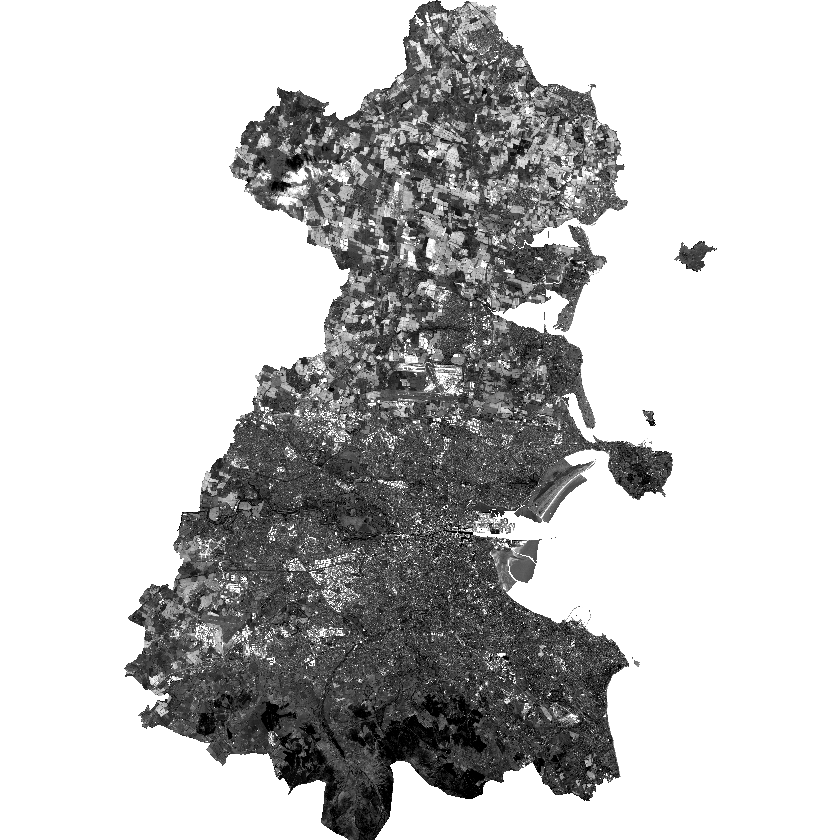

In [23]:
plotRGB(masked, r=3, g=3, b=3, stretch="lin")

To examine the underlying data distribution in more detail, we will look at a histogram of a specific band with the function hist().

class       : Extent 
xmin        : 663550 
xmax        : 699250 
ymin        : 5895810 
ymax        : 5946420 

Warning message in .hist1(x, maxpixels = maxpixels, main = main, plot = plot, ...):
"1% of the raster cells were used. 100000 values used."

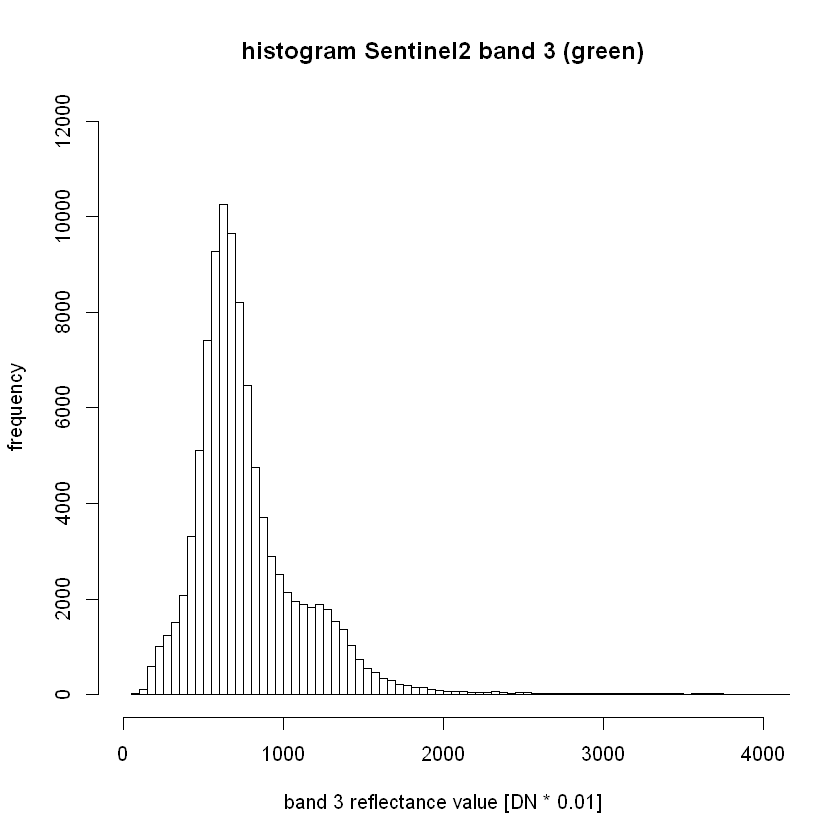

In [29]:
extent(masked[[3]])
band3 <- masked[[3]]
hist(band3,
     breaks = 200,
     xlim = c(0, 4000),
     ylim = c(0, 12000),
     xlab = "band 3 reflectance value [DN * 0.01]",
     ylab = "frequency",
     main = "histogram Sentinel2 band 3 (green)"
)

In [30]:
# create a grayscale color palette to use for the image.
grayscale_colors <- gray.colors(100,            # number of different color levels 
                                start = 0.0,    # how black (0) to go
                                end = 1.0,      # how white (1) to go
                                gamma = 2.2,    # correction between how a digital 
                                # camera sees the world and how human eyes see it
                                alpha = NULL)   #Null=colors are not transparent

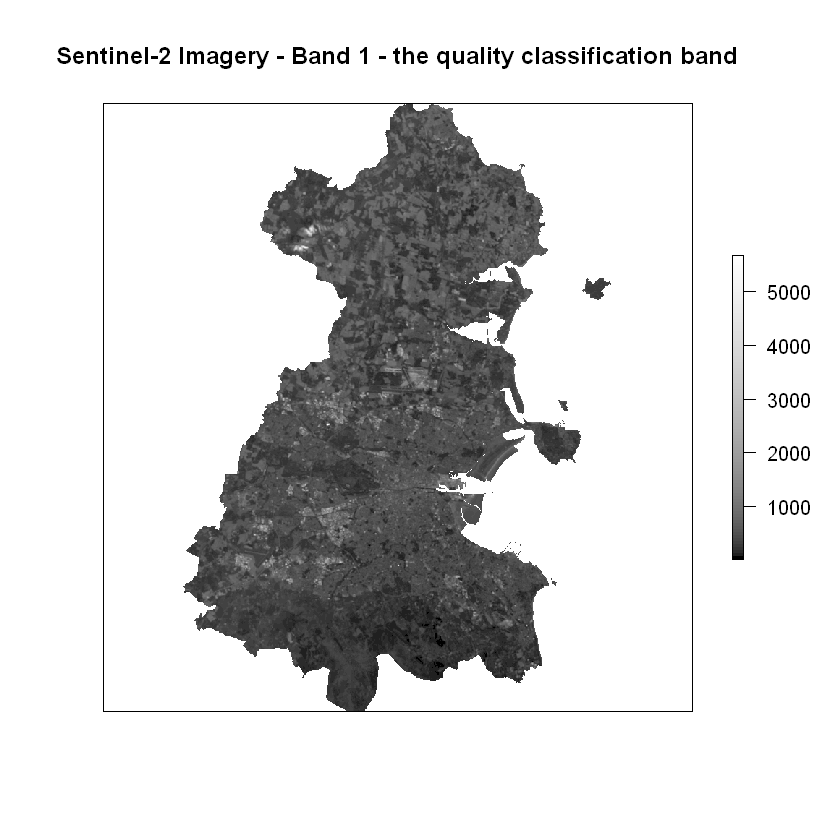

In [31]:
# Plot band 1
plot(masked[[1]], 
     col=grayscale_colors, 
     axes=FALSE,
     main="Sentinel-2 Imagery - Band 1 - the quality classification band") 

Save the area of interest on hard drive.

In [32]:
masked <- stack(masked)
masked <- masked[[1:7]] # keep only first 7 bands
names <- c("band1","band2","band3","band4","band5","band6","band7")
bandnames <- paste0(names, format=".tif") # change band names
names(masked) <- bandnames
hasValues(masked)

[1] TRUE

In [33]:
# save area of interest on hard drive 
writeRaster(masked, "masked.tif", "GTiff", overwrite = T)